# Introduction To PCA
In this notebook we will try to find why we need to perform PCA  
[Answer](#99)

<a id=0>
    

## Content
1. [KNN](#1)
2. [Performing PCA](#2)
3. [KNN on Steriod](#3)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
%%time
df= pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')

display(df.head())
print()
print(df.shape,'\n')
display(df.info())
print()
display(df.describe())


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



(60000, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


None

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


CPU times: user 7.09 s, sys: 670 ms, total: 7.77 s
Wall time: 8.94 s


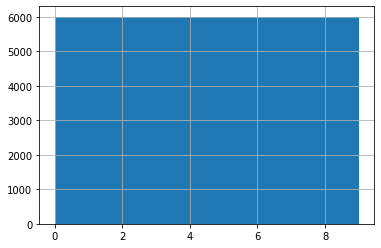

In [3]:
# Checking the distribution of Label
df.label.hist();

#### Label seems perfectly distributed

In [4]:
y=df.iloc[:,0].values  ### Storing labels in y
x=df.iloc[:,1:].values ### Storing complete data base except label

In [5]:
# Checking the data type x and y
print('Data type of y i.e label       : ', y.dtype)
print('Data type of x i.e image pixel : ', x.dtype)

Data type of y i.e label       :  int64
Data type of x i.e image pixel :  int64


In [6]:
x[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,
         0,   0,   0,  62,  61,  21,  29,  23,  51, 136,  61,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  88, 201, 228, 225, 255, 115,  62, 137, 255, 235, 222,
       255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  47, 252, 234, 238, 224, 215, 215, 229, 108, 180, 207,
       214, 224, 231, 249, 254,  45,   0,   0,   0,   0,   0,   0,   0,
         0,   1,   0,   0, 214, 222, 210, 213, 224, 225, 217, 22

In [7]:
## Reshaping the data into 28x28
a= x[0].reshape(28,28)
a

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   4,   0,   0,   0,   0,   0,  62,  61,  21,
         29,  23,  51, 136,  61,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  88, 201, 228, 225, 255, 115,
         62, 137, 255, 235, 222, 255, 135,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  47, 252, 234, 238, 224, 215, 215, 229,
        108, 180, 207, 214, 224, 231, 249, 254,  45,   0,   0,   0,   0,
          0,   0],
       [  

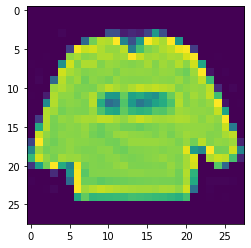

In [8]:
plt.imshow(a)

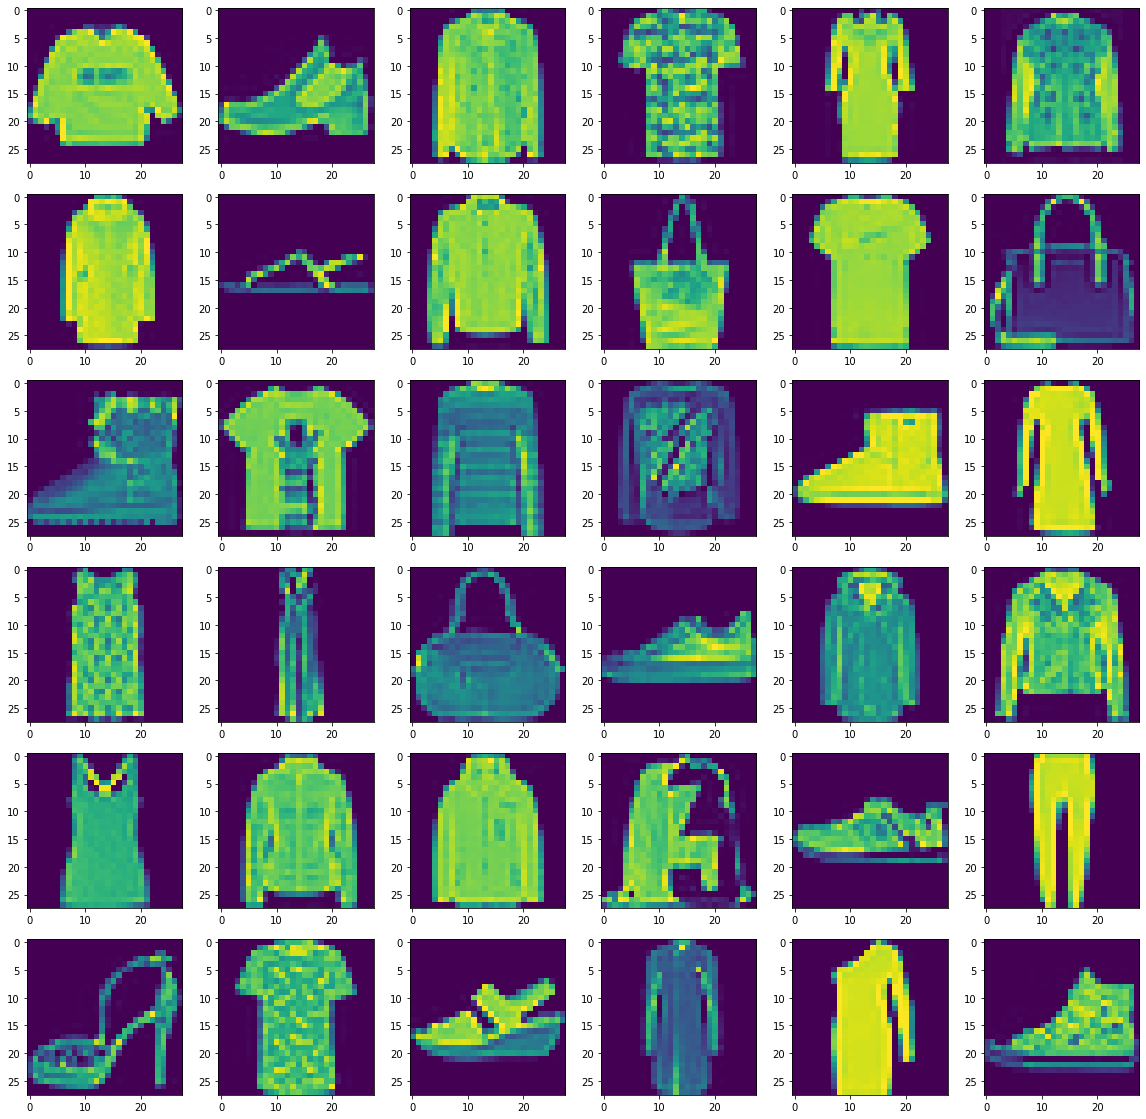

In [9]:
plt.figure(figsize=(20,20))
for i in range(36):
    a= x[i].reshape(28,28)
    plt.subplot(6,6,(i+1))
    plt.imshow(a)

### Creating train test split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

<a id=1>
    

# KNN
* KNN is used for Non-Linear data set
* It comes under `Supervised Learning`

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Choosing a K Value
Had to cancel as it was taking too much time

In [12]:
'''
%%time
################ Choosing a K Value  ##############################################

#Let's go ahead and use the elbow method to pick a good K Value:

error_rate = []


# Will take some time

for i in range(1,15):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))

plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')

plt.xlabel('K')

plt.ylabel('Error Rate')
''';

# This was taking a lot of time thus had to turn it off

In [13]:
clf= KNeighborsClassifier(n_neighbors=5)

In [14]:
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
%%time
y_pred= clf.predict(X_test)

CPU times: user 15min 49s, sys: 78 ms, total: 15min 49s
Wall time: 15min 49s


# Evaluation

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [17]:
accuracy_score(y_test,y_pred)

0.8554166666666667

In [18]:
print(confusion_matrix(y_test,y_pred))

[[1017    0   21   26    4    0  106    0    9    0]
 [   3 1159    5   23    2    0    3    0    0    0]
 [  24    0  978    6   97    0   74    0    2    0]
 [  59    9   14 1037   49    0   35    0    1    0]
 [   5    0  140   52  926    0  106    0    2    0]
 [   1    0    0    0    0 1025    6  136    8   70]
 [ 197    3  163   16   83    0  692    0    9    0]
 [   0    0    0    0    0    5    1 1146    0   50]
 [   4    0   16   10   14    0   17    7 1156    3]
 [   0    0    0    0    0    0    0   39    0 1129]]


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1183
           1       0.99      0.97      0.98      1195
           2       0.73      0.83      0.78      1181
           3       0.89      0.86      0.87      1204
           4       0.79      0.75      0.77      1231
           5       1.00      0.82      0.90      1246
           6       0.67      0.60      0.63      1163
           7       0.86      0.95      0.91      1202
           8       0.97      0.94      0.96      1227
           9       0.90      0.97      0.93      1168

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.85     12000
weighted avg       0.86      0.86      0.85     12000



# Now Using `PCA` we will reduce no of features
* Step 1 : Feature Scaling (will convert all value between 0-1{Currently it's between 0-225})
* Step 2 : Apply PCA

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()                             ### this function scale the data to 0 to 1
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
%%time

#Apply PCA
from sklearn.decomposition import PCA
# Now creating an object 
pca=PCA(n_components=None)   # present feature 786, we will create 786 features (n_components=None) too but won't use them all

X_train_new= pca.fit_transform(X_train)
X_test_new= pca.fit_transform(X_test)

# we will get same shaped  
print(X_train.shape)
print(X_train_new.shape)

(48000, 784)
(48000, 784)
CPU times: user 28.8 s, sys: 11.2 s, total: 40 s
Wall time: 13.3 s


In [22]:
pca.explained_variance_ratio_.shape

(784,)

In [23]:
pca.explained_variance_ratio_

array([2.20598174e-01, 1.43695270e-01, 5.35975597e-02, 5.08347977e-02,
       4.12298644e-02, 2.99743621e-02, 2.70119559e-02, 2.27484629e-02,
       1.69320890e-02, 1.46982754e-02, 1.27257526e-02, 1.15475273e-02,
       9.37946897e-03, 8.68037291e-03, 7.97798953e-03, 7.55309118e-03,
       7.23352501e-03, 6.72209718e-03, 6.17272272e-03, 5.90405607e-03,
       5.57094656e-03, 5.05276427e-03, 4.75688723e-03, 4.66848878e-03,
       4.37522962e-03, 4.24883688e-03, 4.22463440e-03, 3.95497270e-03,
       3.89670703e-03, 3.80311725e-03, 3.70821387e-03, 3.57272599e-03,
       3.47371953e-03, 3.41078606e-03, 3.34346882e-03, 3.24204340e-03,
       3.15577950e-03, 2.99005433e-03, 2.95234078e-03, 2.80552107e-03,
       2.74732975e-03, 2.74380425e-03, 2.63088688e-03, 2.58018135e-03,
       2.43293355e-03, 2.37688624e-03, 2.37103691e-03, 2.23837066e-03,
       2.23233524e-03, 2.20428538e-03, 2.17510770e-03, 2.07536340e-03,
       2.05598863e-03, 2.03067475e-03, 1.97329412e-03, 1.95348876e-03,
      

* Har column mera dataset ka kitna variance explain kar paraha hai ye bata raha hai
* 1st column can explain 22% variance
* 2nd column can explain 14% variance
* 3rd column can explain 5% variance
* 4th column can explain 4% variance
and so on

In [24]:
%%time

# We will now consider top 50 columns 

#Apply PCA
from sklearn.decomposition import PCA
# Now creating an object 
pca=PCA(n_components=50)   # present feature 786, we will create top 5 features (n_components=50)
X_train_new1= pca.fit_transform(X_train)
X_test_new1= pca.fit_transform(X_test)

# we will get same shaped  
print("Original Dataset  : ",X_train.shape)
print("after PCA Dataset : ",X_train_new1.shape)

Original Dataset  :  (48000, 784)
after PCA Dataset :  (48000, 50)
CPU times: user 14.3 s, sys: 2.21 s, total: 16.5 s
Wall time: 4.56 s


## Now we will fit KNN on PCA dataset

In [25]:
%%time
clf.fit(X_train_new1,y_train)

CPU times: user 497 ms, sys: 53 ms, total: 550 ms
Wall time: 485 ms


KNeighborsClassifier()

In [26]:
%%time
y_pred_new= clf.predict(X_test_new1)

CPU times: user 36.5 s, sys: 7.02 ms, total: 36.5 s
Wall time: 36.5 s


In [27]:
accuracy_score(y_test, y_pred_new)

0.69225

In [28]:
print("Classification Report",'\n')
print(classification_report(y_test,y_pred_new),'\n')
print()
print("Classification old Report",'\n')
print(classification_report(y_test,y_pred),'\n')


Classification Report 

              precision    recall  f1-score   support

           0       0.66      0.75      0.71      1183
           1       0.94      0.92      0.93      1195
           2       0.53      0.61      0.57      1181
           3       0.66      0.75      0.70      1204
           4       0.53      0.40      0.46      1231
           5       0.90      0.49      0.63      1246
           6       0.37      0.34      0.35      1163
           7       0.62      0.93      0.75      1202
           8       0.95      0.89      0.92      1227
           9       0.85      0.85      0.85      1168

    accuracy                           0.69     12000
   macro avg       0.70      0.69      0.69     12000
weighted avg       0.70      0.69      0.69     12000
 


Classification old Report 

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1183
           1       0.99      0.97      0.98      1195
           2       0.73

# Finding optimum no of Dimensions PCA

In [29]:
%%time
accuracy=[]  # empty list
for i in range(1,100):     # u can try upto 785                    
    pca=PCA(n_components=i)
    x_train1= pca.fit_transform(X_train)
    x_test1 = pca.transform(X_test)
    clf.fit(x_train1,y_train)
    y_pred_try= clf.predict(x_test1)
    t=accuracy_score(y_test,y_pred_try)
    print('No of dimension : ',i,'  Accuracy = ',t)
    accuracy.append(t)

No of dimension :  1   Accuracy =  0.24625
No of dimension :  2   Accuracy =  0.5033333333333333
No of dimension :  3   Accuracy =  0.61975
No of dimension :  4   Accuracy =  0.7046666666666667
No of dimension :  5   Accuracy =  0.74575
No of dimension :  6   Accuracy =  0.7690833333333333
No of dimension :  7   Accuracy =  0.7818333333333334
No of dimension :  8   Accuracy =  0.7921666666666667
No of dimension :  9   Accuracy =  0.7991666666666667
No of dimension :  10   Accuracy =  0.8145
No of dimension :  11   Accuracy =  0.8196666666666667
No of dimension :  12   Accuracy =  0.82125
No of dimension :  13   Accuracy =  0.8256666666666667
No of dimension :  14   Accuracy =  0.82725
No of dimension :  15   Accuracy =  0.8336666666666667
No of dimension :  16   Accuracy =  0.834
No of dimension :  17   Accuracy =  0.83575
No of dimension :  18   Accuracy =  0.8350833333333333
No of dimension :  19   Accuracy =  0.8379166666666666
No of dimension :  20   Accuracy =  0.8380833333333333


In [30]:
# accuracy

In [31]:
y_pred.shape

(12000,)